In [10]:
from coniii import *
# address C:\Users\Riickyyy\anaconda3\envs\coniii\Lib\site-packages\coniii

In [17]:
# Total Timeline T = 100
T = 500
# Number of neuros
N = 8

#Spike Apear Probability in Timeline 
Spikes_Probability = 0.1
#Number of Random Firing Timeline Points
N_tp = int(T * Spikes_Probability)
# Number of classify group
N_groups = 4

# Create Random Neuros Spikes Timeline (N_groups tpyes overall)
Random_NT = np.random.permutation(T)

# N_tp(10) random time points of firing for group i(overall is 4)
# Each Group Size is  (N_tp,1) contains the Random Firing Timeline Points
groups = []
for i in range(N_groups):
    start_index = i * N_tp
    end_index = (i + 1) * N_tp
    group = Random_NT[start_index:end_index]
    groups.append(group)

In [18]:
# Initializing Samples() to 0(8*10) and datatype
firing_rate = 0.8
samples = np.zeros((N,T), dtype = np.float32)

# Generate samples for each group
num_samples = int(N/N_groups)

for i, group in enumerate(groups):
    start_sample = int(num_samples * i)
    end_sample = int(num_samples * (i+1))
    samples[start_sample:end_sample, group] = (np.random.rand(num_samples, len(group)) < firing_rate)
    
# # Pick the Random Firing Timeline Points(set 2 * 10 ) in the Whole Samples
# # Use Bool to Control the T/F (1/0)
# samples[: int(N/N_groups), groups[0]] = (np.random.rand(int(N/N_groups),len(groups[0])) < firing_rate)
# samples[: int(N/N_groups), groups[1]] = (np.random.rand(int(N/N_groups),len(groups[1])) < firing_rate)
# samples[: int(N/N_groups), groups[2]] = (np.random.rand(int(N/N_groups),len(groups[2])) < firing_rate)
# samples[: int(N/N_groups), groups[3]] = (np.random.rand(int(N/N_groups),len(groups[3])) < firing_rate)

In [19]:
np.random.rand(num_samples, len(group)).shape

(2, 50)

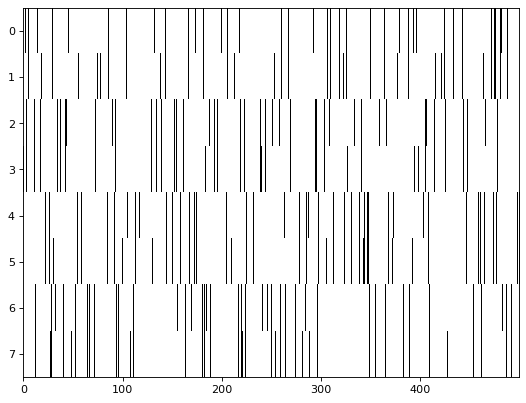

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

In [21]:
from coniii.utils import define_ising_helper_functions
from coniii import ClusterExpansion, pair_corr

import matplotlib.pyplot as plt
import numpy as np

In [22]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()

test artifical data 

In [29]:
import matplotlib.pyplot as plt
import h5py
file = h5py.File('C:\\Users\\Riickyyy\\Desktop\\RA\\~\\HEX5_K5_medium__T1800s_dT500ms_cT1s_sKInf_eF10.0mHz_eM6_nS0\\HEX5_K5_medium__T1800s_dT500ms_cT1s_sKInf_eF10.0mHz_eM6_nS0_ACTIVITY-RASTER.mat', 'r')

In [30]:
es_samples = np.array(file['activity_raster']) ##如何加进度条

In [31]:
es_samples.shape

(91, 3600)

In [32]:
es_samples[es_samples == 0] = -1

In [69]:
# Declare and call solver.

solver = ClusterExpansion(es_samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=1e-3, full_output=True)

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 3


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 4
adaptiveClusterExpansion: Clusters of size 5


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\numpy\lib\scimath.py:296: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\mean_field_ising.py:404: RuntimeWarning: invalid value encountered in multiply
  return - scipy.sum( p * scipy.log(p) )


adaptiveClusterExpansion: Clusters of size 6


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 3200.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 7


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 4400.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 8


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 5800.
  warnings.warn(errors[info][0], RuntimeWarning)


KeyboardInterrupt: 

In [44]:
nonzero_indices = np.nonzero(multipliers)

In [64]:
(nonzero_indices[0]).shape

(378,)

In [45]:
N = es_samples.shape[0]

J = multipliers[N:]

# 创建一个 N*N 的零矩阵
matrix = np.zeros((N, N))

# # 使用数组的前N个元素填充对角线
# matrix[np.diag_indices(FISH_N)] = multipliers[:FISH_N]

# 使用数组的后N+2(N*N-1)个元素填充上半矩阵
index = N
for i in range(N):
    for j in range(i+1, N):
        matrix[i, j] = multipliers[index]
        index += 1
# 获取上半矩阵（包含对角线）
upper_matrix = np.triu(matrix)

# 转置上半矩阵并将其添加到下半部分
lower_matrix = np.transpose(upper_matrix)
lower_matrix = np.tril(lower_matrix, -1)

# 将上半矩阵和转置的下半矩阵相加得到完整的矩阵
final_matrix = upper_matrix + lower_matrix

In [56]:
final_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.87714391,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.87714391,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

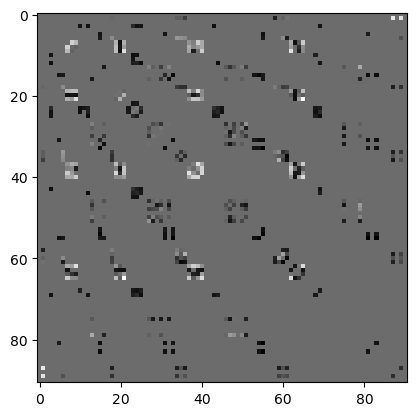

In [48]:
plt.imshow(final_matrix, cmap='gray_r')

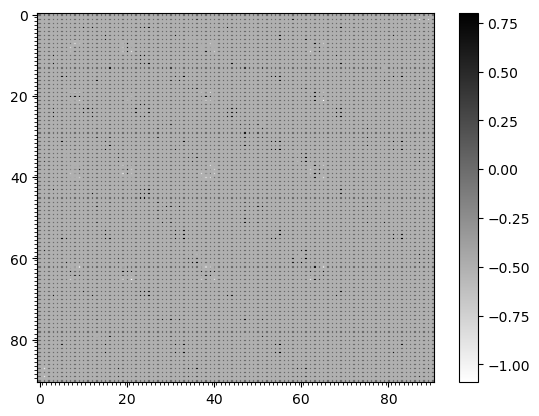

In [57]:
#plot imshow and add lines
plt.imshow(final_matrix, aspect="auto", cmap="gray_r")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, final_matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, final_matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()

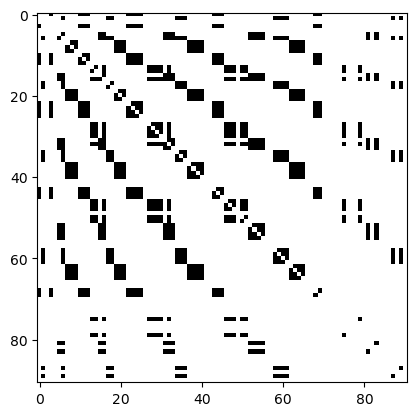

In [49]:
import numpy as np

# 创建91x91的0矩阵
matrix = np.zeros((91, 91))

# 给出的数组
arrays = [
    np.array([14,15,17,28,29,30,31,33,47,48,49,51,52,76,80], dtype=np.uint16),
    np.array([9,10,20,21,22,39,40,41,63,64,8,38,65,66], dtype=np.uint16),
    np.array([6,7,16,17,32,33,34,53,54,55,82,84,56], dtype=np.uint16),
    np.array([2,7,18,19,35,36,37,59,60,61,62,88,90], dtype=np.uint16),
    np.array([1,4,11,12,13,23,24,25,26,44,45,46,69,70], dtype=np.uint16)
]

# 把数组的元素映射到矩阵上
for arr in arrays:
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            # 设置对应位置为1，这里我们使用 index-1 是因为 numpy 的索引是从0开始的
            matrix[arr[i]-1, arr[j]-1] = 1
            matrix[arr[j]-1, arr[i]-1] = 1  # 如果关系是双向的，我们需要同时设置两个位置

plt.imshow(matrix, cmap='gray_r')



In [68]:
((np.nonzero(matrix))[0]).shape

(884,)

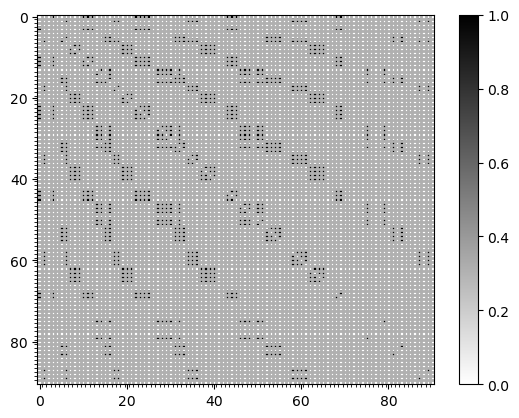

In [29]:
#plot imshow and add lines
import matplotlib.pyplot as plt
plt.imshow(matrix, aspect="auto", cmap="gray_r")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()